In [1]:
import sys
import sklearn
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc("xtick", labelsize = 12)
mpl.rc("ytick", labelsize = 12)

# to make this notebook's output indentical at every run
np.random.seed(42)

In [2]:
# Where to save figures
project_root_dir = "/Users/jiangyi/ML"
Chapter_id = "class_project"
Image_path = os.path.join(project_root_dir,"images",Chapter_id)
os.makedirs(Image_path, exist_ok = True)

In [3]:
def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
    path = os.path.join('/Users/jiangyi/ML/images', fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)
        


In [4]:
import pandas as pd

In [5]:
AB = pd.read_csv('/Users/jiangyi/ML/AB.csv')

In [6]:
AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
AB.shape # The data set including 48895 observations and 16 attributes 

(48895, 16)

In [9]:
# Drop useless columns such as id&name
columns_need_to_drop = ["id",'name',
                        'host_id',
                        "host_name", 
                        'last_review',
                       'neighbourhood']
columns_need_to_drop

['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood']

In [10]:
AB_clean = AB.drop(columns = columns_need_to_drop)
print('shap:',AB_clean.shape)

shap: (48895, 10)


In [11]:
AB_clean.head(10)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [12]:
AB_clean['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
AB['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Willowbrook              1
Fort Wadsworth           1
Rossville                1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [14]:
AB["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [15]:
AB_clean['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
## price is really skewed, the outliers needs to be removed(out of three standard deviation from the mean)
three_std = 152 + (240 * 3)
outliers = AB[AB.price > three_std]
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,11,364


In [17]:
outliers.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.880000e+02,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,196.000000,388.000000,388.000000
mean,1.897967e+07,7.097079e+07,40.733587,-73.975554,1899.695876,13.358247,7.927835,0.884745,3.713918,186.858247
std,1.202956e+07,8.327660e+07,0.044135,0.040408,1659.006591,38.760552,18.483877,1.154057,11.601172,150.538819
min,1.749660e+05,8.730000e+03,40.530760,-74.202950,875.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,6.961303e+06,7.054422e+06,40.715395,-73.997110,1000.000000,1.000000,0.000000,0.170000,1.000000,1.500000
50%,1.971695e+07,2.691635e+07,40.736665,-73.982355,1200.000000,2.000000,1.000000,0.405000,1.000000,180.000000
75%,3.092980e+07,1.253204e+08,40.760802,-73.964080,2000.000000,6.000000,6.000000,1.000000,2.000000,358.000000
max,3.631106e+07,2.721663e+08,40.886710,-73.741300,10000.000000,365.000000,141.000000,7.020000,121.000000,365.000000


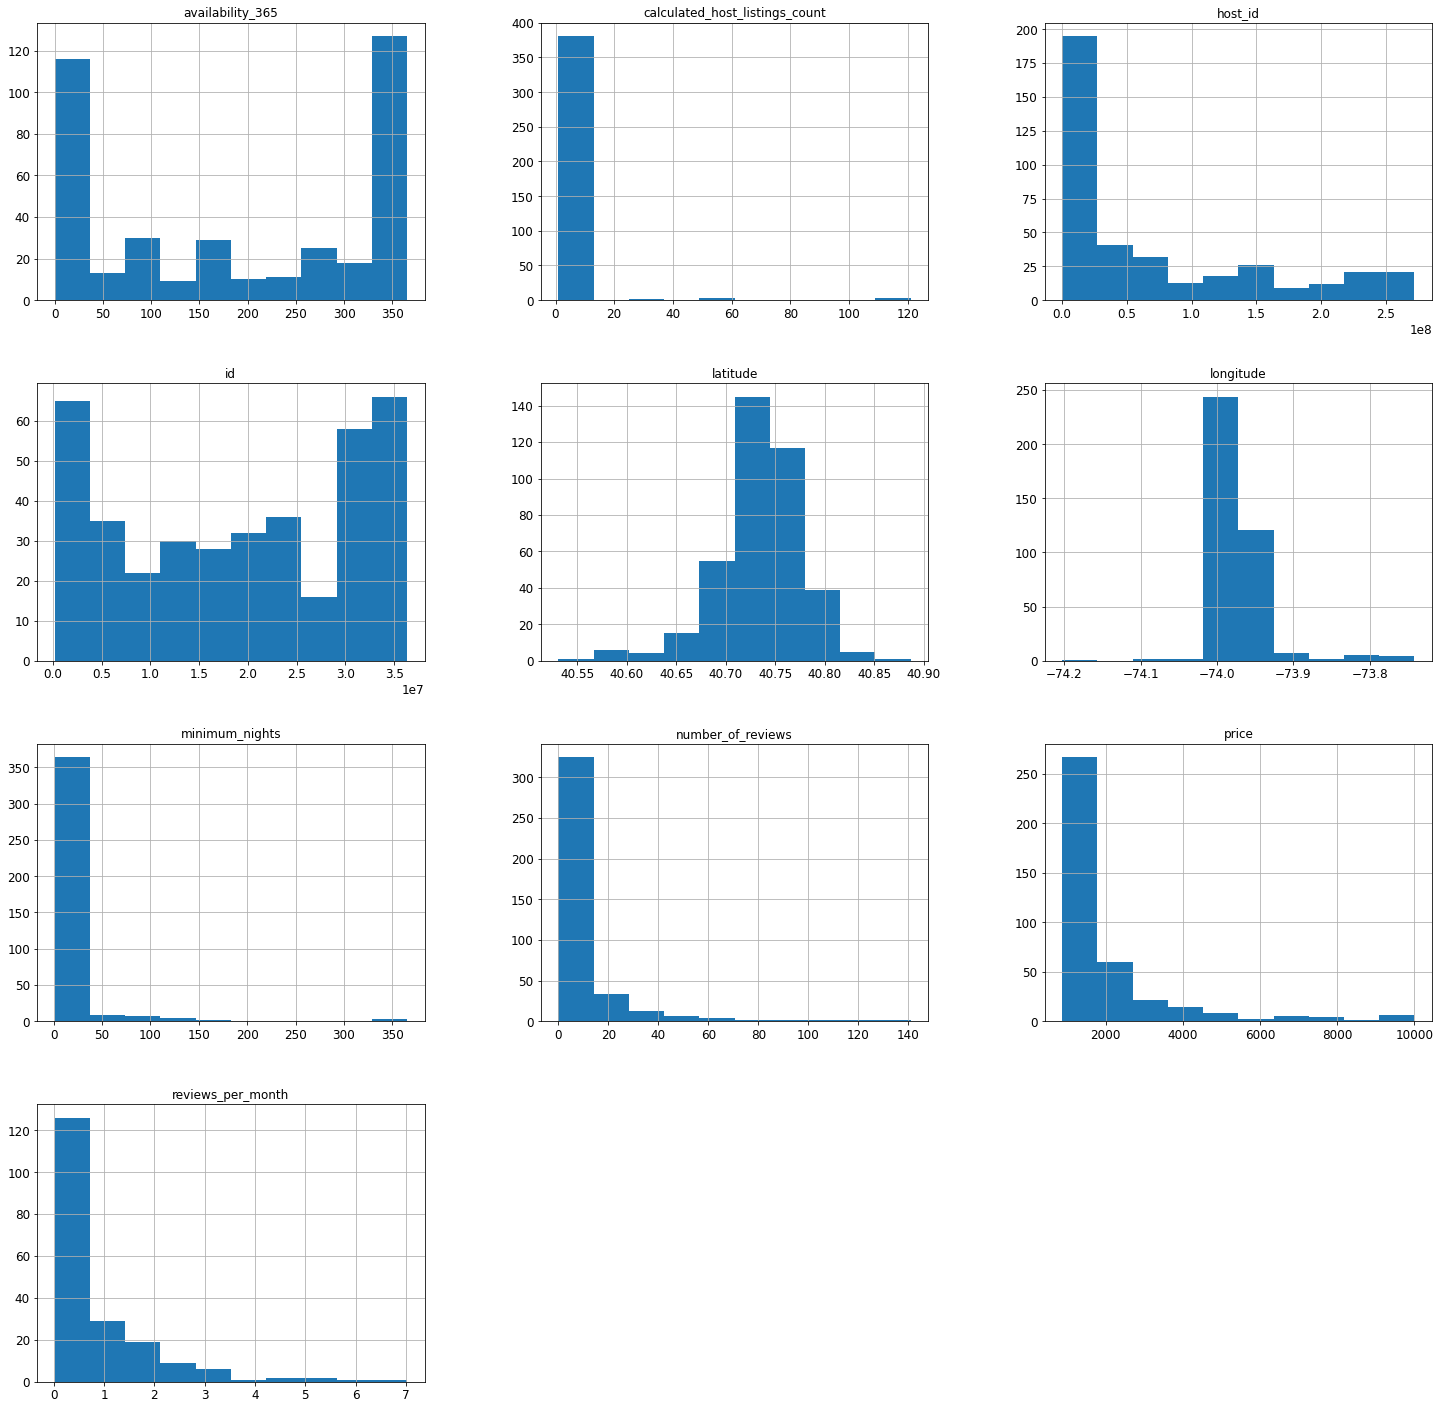

In [18]:
outliers.hist(bins = 10, figsize = (25,25))
plt.show()

In [19]:
outlier_index = outliers.index
AB_clean = AB_clean.drop(index = outlier_index)

In [20]:
AB_clean.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48507.000000,48507.000000,48507.000000,48507.000000,48507.000000,38647.000000,48507.000000,48507.000000
mean,40.728912,-73.951983,138.746903,6.979343,23.397221,1.375699,7.171419,112.188797
std,0.054604,0.046152,107.558233,20.291333,44.676679,1.682341,33.066384,131.293391
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689975,-73.982900,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.722920,-73.955520,105.000000,3.000000,5.000000,0.720000,1.000000,44.000000
75%,40.763130,-73.936020,175.000000,5.000000,24.000000,2.020000,2.000000,225.000000
max,40.913060,-73.712990,860.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


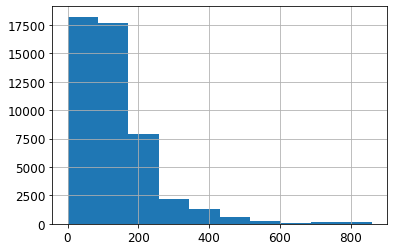

In [21]:
AB_clean['price'].hist()

In [22]:
AB_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48507 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48507 non-null  object 
 1   latitude                        48507 non-null  float64
 2   longitude                       48507 non-null  float64
 3   room_type                       48507 non-null  object 
 4   price                           48507 non-null  int64  
 5   minimum_nights                  48507 non-null  int64  
 6   number_of_reviews               48507 non-null  int64  
 7   reviews_per_month               38647 non-null  float64
 8   calculated_host_listings_count  48507 non-null  int64  
 9   availability_365                48507 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 4.1+ MB


In [23]:
# Check how many missing value there
# last_review is time we don't need to fillna
AB_clean.isnull().sum()

neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9860
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [24]:
AB_clean['reviews_per_month'].describe()

count    38647.000000
mean         1.375699
std          1.682341
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [25]:
# fill NA value with median = 0.72 for reviews_per_month
AB_clean['reviews_per_month'].fillna(0.72, inplace = True)

In [26]:
# no more missing value in reviews_per_month
AB_clean.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Discover and visualize the data to gain insights


Saving figure availability_and_price


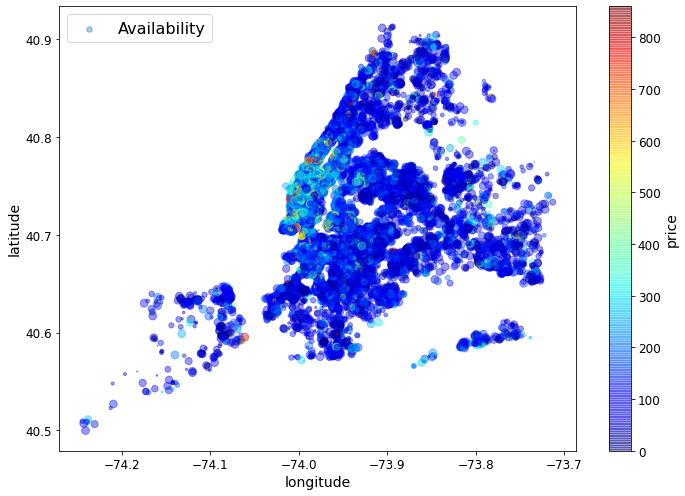

In [144]:
AB_clean.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
       s = AB_clean['availability_365']/6, label = 'Availability', figsize = (10,7),c = "price",
       cmap = plt.get_cmap("jet"),colorbar = True, sharex = False)
plt.legend(fontsize=16)
save_fig("availability_and_price")
plt.show()

Saving figure number_of_reviews_and_price


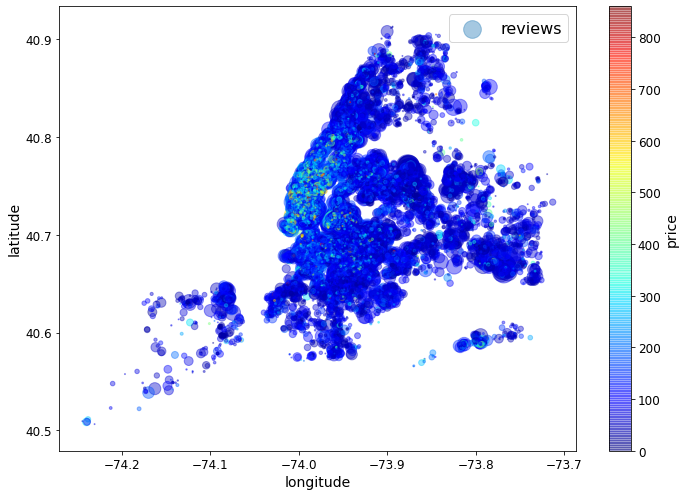

In [145]:
AB_clean.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
       s = AB_clean['number_of_reviews'], label = 'reviews', figsize = (10,7),c = "price",
       cmap = plt.get_cmap("jet"),colorbar = True, sharex = False)
plt.legend(fontsize=16)
save_fig("number_of_reviews_and_price")
plt.show()

In [31]:
corr_matrix = AB_clean.corr()

In [32]:
corr_matrix['price'].sort_values(ascending=False)

# Attributes is not correlate with 

price                             1.000000
calculated_host_listings_count    0.144353
availability_365                  0.113529
latitude                          0.065446
minimum_nights                    0.023357
reviews_per_month                -0.040067
number_of_reviews                -0.056082
longitude                        -0.271207
Name: price, dtype: float64

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
attributes_1 = ["price",
              "availability_365", 
              "calculated_host_listings_count",
              "minimum_nights",
             "number_of_reviews",]
attributes_2 = ["price",
               "latitude",
                "longitude",]

Saving figure Correlation


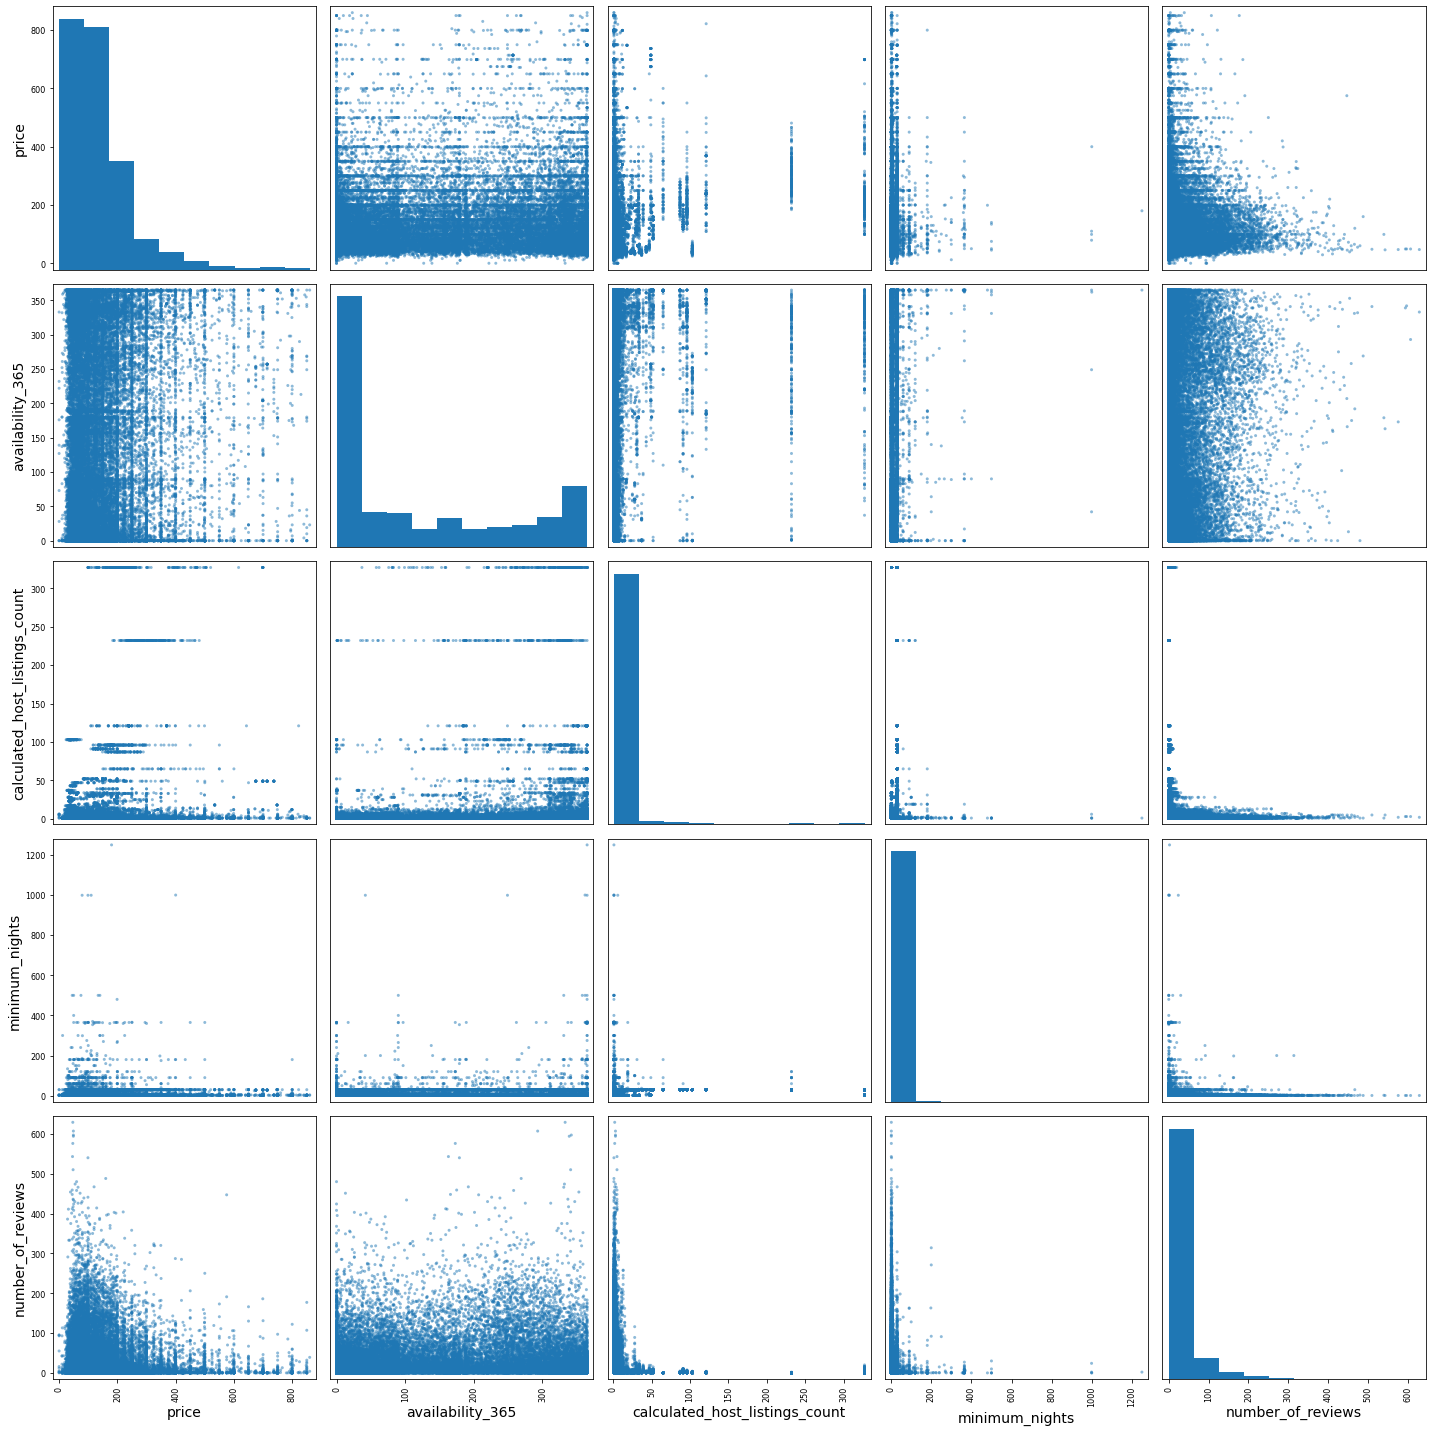

In [133]:
scatter_matrix(AB_clean[attributes_1], figsize = (20,20))
save_fig('Correlation')
plt.show()


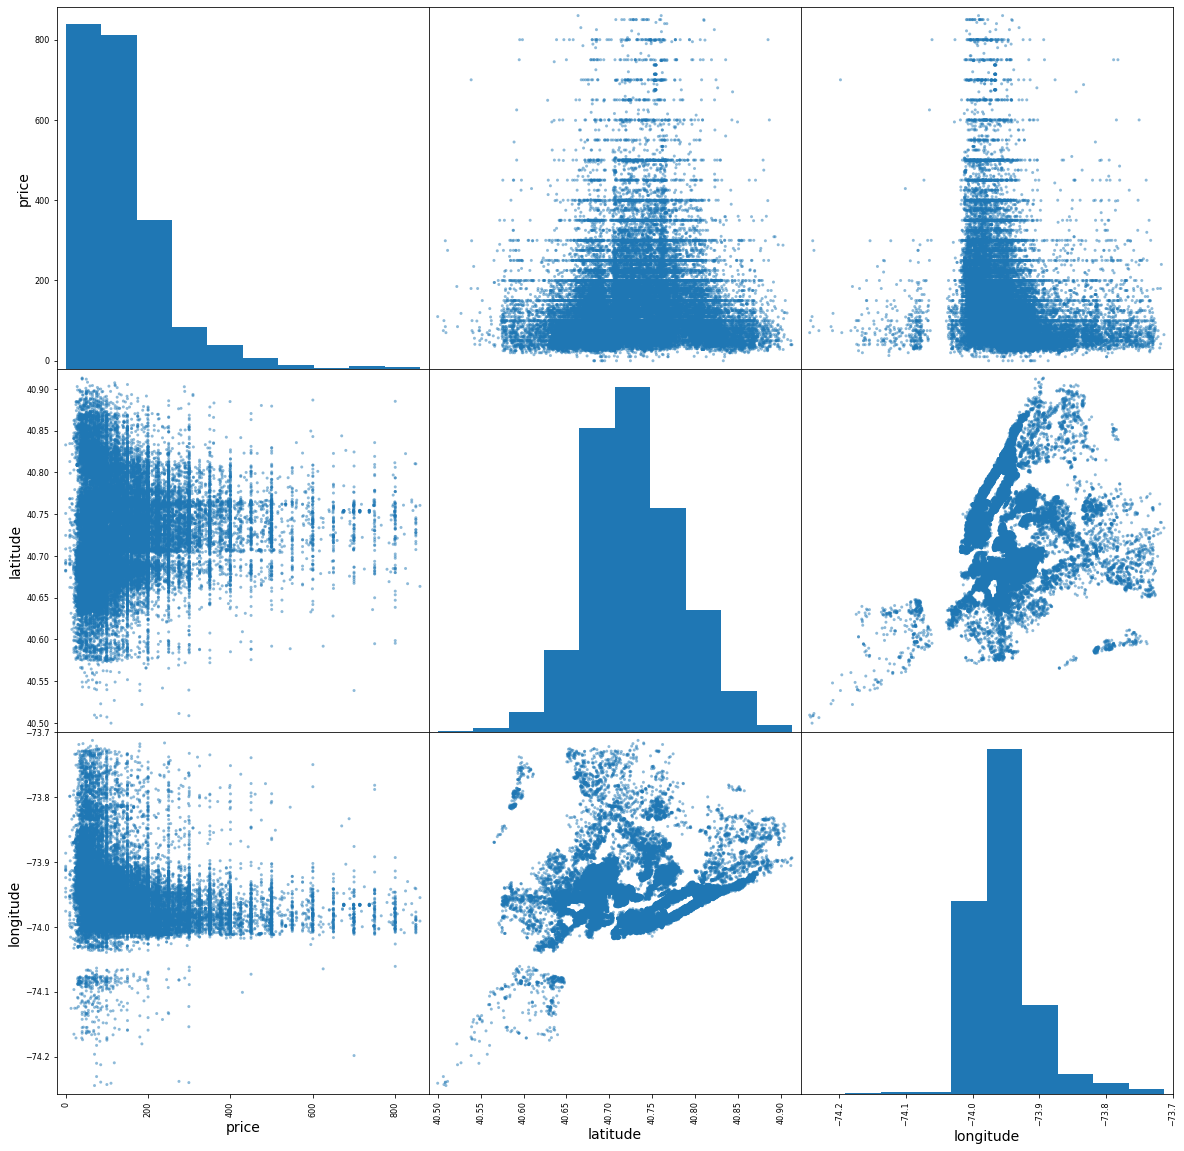

In [36]:
scatter_matrix(AB_clean[attributes_2], figsize = (20,20))
plt.show()

In [37]:
## Sepearte the test set and train set 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(AB_clean, test_size = 0.2, random_state = 42)


In [38]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9702 entries, 47668 to 38417
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             9702 non-null   object 
 1   latitude                        9702 non-null   float64
 2   longitude                       9702 non-null   float64
 3   room_type                       9702 non-null   object 
 4   price                           9702 non-null   int64  
 5   minimum_nights                  9702 non-null   int64  
 6   number_of_reviews               9702 non-null   int64  
 7   reviews_per_month               9702 non-null   float64
 8   calculated_host_listings_count  9702 non-null   int64  
 9   availability_365                9702 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 833.8+ KB


In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38805 entries, 7745 to 15935
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38805 non-null  object 
 1   latitude                        38805 non-null  float64
 2   longitude                       38805 non-null  float64
 3   room_type                       38805 non-null  object 
 4   price                           38805 non-null  int64  
 5   minimum_nights                  38805 non-null  int64  
 6   number_of_reviews               38805 non-null  int64  
 7   reviews_per_month               38805 non-null  float64
 8   calculated_host_listings_count  38805 non-null  int64  
 9   availability_365                38805 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.3+ MB


In [40]:
# Drop label from train set
AB_witout_label = train_set.drop('price', axis = 1)
# drop label for training set
AB_labels = train_set['price'].copy()
AB_witout_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38805 entries, 7745 to 15935
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38805 non-null  object 
 1   latitude                        38805 non-null  float64
 2   longitude                       38805 non-null  float64
 3   room_type                       38805 non-null  object 
 4   minimum_nights                  38805 non-null  int64  
 5   number_of_reviews               38805 non-null  int64  
 6   reviews_per_month               38805 non-null  float64
 7   calculated_host_listings_count  38805 non-null  int64  
 8   availability_365                38805 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 3.0+ MB


In [41]:
cat_col_name = ['neighbourhood_group', 'room_type']
AB_number = AB_witout_label.drop(columns = cat_col_name)
AB_number.head()


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7745,40.76279,-73.92039,2,16,0.31,1,0
24358,40.78324,-73.94871,2,4,0.17,1,0
23090,40.72008,-73.98268,3,28,1.07,1,0
27953,40.76427,-73.98208,2,0,0.72,4,229
33365,40.67499,-73.95729,2,16,1.33,1,0


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [43]:
AB_cat = train_set[cat_col_name]
AB_cat.head(10)

,neighbourhood_group,room_type
7745,Queens,Entire home/apt
24358,Manhattan,Private room
23090,Manhattan,Private room
27953,Manhattan,Entire home/apt
33365,Brooklyn,Entire home/apt
46767,Manhattan,Entire home/apt
34362,Queens,Private room
13232,Manhattan,Private room
32895,Brooklyn,Private room
33493,Brooklyn,Entire home/apt


In [44]:
%time
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
AB_cat_encoded = ordinal_encoder.fit_transform(AB_cat)
AB_cat_encoded

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


array([[3., 0.],
       [2., 1.],
       [2., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [2., 0.]])

In [45]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = list(AB_number)
cat_attribs = cat_col_name

In [47]:
full_pipeline = ColumnTransformer([
     ('num', num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [48]:
AB_prepared = full_pipeline.fit_transform(AB_witout_label)
AB_prepared

array([[ 0.62211481,  0.68516161, -0.23866161, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.9972318 ,  0.07219682, -0.23866161, ...,  0.        ,
         1.        ,  0.        ],
       [-0.16132025, -0.6630579 , -0.19119351, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.90623473, -0.56306153,  0.14108319, ...,  0.        ,
         1.        ,  0.        ],
       [-0.75233588, -0.47973122, -0.19119351, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36164237, -0.44120447,  1.0904452 , ...,  1.        ,
         0.        ,  0.        ]])

# Select and train model

In [49]:
%time
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(AB_prepared, AB_labels)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


LinearRegression()

In [50]:
line_reg.coef_

array([ -6.86188615, -18.07588933,  -6.20588809,  -8.24393666,
         1.64682635,   1.68015585,  16.41823372,  22.38858457,
         4.74265648,  49.47923792,  23.24307383, -99.8535528 ,
        72.54043117, -22.25314533, -50.28728584])

In [51]:
# Evaluation regression model with training set by rmse 

from sklearn.metrics import mean_squared_error
price_predictions = line_reg.predict(AB_prepared)
line_mse = mean_squared_error(AB_labels, price_predictions)
line_rmse = np.sqrt(line_mse)
line_rmse

86.57688332032971

In [52]:
# Evaluation Regression model with mean absolute error
from sklearn.metrics import mean_absolute_error
line_mae = mean_absolute_error(AB_labels, price_predictions)
line_mae

53.96413643483408

In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(AB_prepared, AB_labels)

DecisionTreeRegressor(random_state=42)

In [54]:
price_predict_tree = tree_reg.predict(AB_prepared)
tree_mse = mean_squared_error(AB_labels, price_predict_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## 0 error usually means this model is overfitting the data

0.0

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, 
                        AB_prepared, AB_labels,
                       scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [109.25626037 108.61461577 110.84969896 107.22005609 111.80132238
 107.27991496 104.5476227  106.94268385 111.61702979 114.22555571]
Mean: 109.23547605901865
Standard deviation: 2.7434809569310494


In [57]:
line_scores = cross_val_score(line_reg, AB_prepared, AB_labels,
                             scoring = 'neg_mean_squared_error', cv = 10)
line_rmse_score = np.sqrt(-line_scores)
display_scores(line_rmse_score)

Scores: [83.78641024 88.59241516 89.76584726 83.33780886 89.40789947 86.23107999
 84.88564675 86.80142542 85.94621166 87.17401982]
Mean: 86.5928764626281
Standard deviation: 2.104920344939833


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(AB_prepared, AB_labels)

RandomForestRegressor()

In [59]:
price_predict_forest = forest_reg.predict(AB_prepared)
forest_mse = mean_squared_error(AB_labels, price_predict_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# RandomForest model have the smallest error

29.241076811459482

In [60]:
forest_scores = cross_val_score(forest_reg, AB_prepared, AB_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [76.75665654 80.91788627 79.41579063 75.67481971 79.45581676 77.07435683
 75.44537969 78.18863248 77.54639841 80.38529182]
Mean: 78.08610291304083
Standard deviation: 1.8119053225579516


# Fine-tune the model

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(AB_prepared, AB_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

89.35736925846527 {'max_features': 2, 'n_estimators': 3}
80.68447815457058 {'max_features': 2, 'n_estimators': 10}
77.70624495474648 {'max_features': 2, 'n_estimators': 30}
88.34297103255824 {'max_features': 4, 'n_estimators': 3}
80.31905716066036 {'max_features': 4, 'n_estimators': 10}
77.70860052599713 {'max_features': 4, 'n_estimators': 30}
88.52177489984712 {'max_features': 6, 'n_estimators': 3}
80.15786012537312 {'max_features': 6, 'n_estimators': 10}
77.75126278061188 {'max_features': 6, 'n_estimators': 30}
88.8127999565744 {'max_features': 8, 'n_estimators': 3}
80.71680176617429 {'max_features': 8, 'n_estimators': 10}
78.07446544782006 {'max_features': 8, 'n_estimators': 30}
89.33996670375083 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
81.17195994626904 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
89.05587109663989 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
80.90350618309094 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087968,0.014443,0.006142,0.000975,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-8070.710705,-8286.218171,...,-7984.739441,208.854347,18,-2022.125782,-2079.624000,-2083.324453,-2027.800813,-2084.205182,-2059.416046,28.229635
1,0.261851,0.007164,0.016888,0.000331,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-6505.942976,-6603.108969,...,-6509.985015,178.047415,7,-1152.018326,-1168.616938,-1132.830039,-1132.942817,-1161.382499,-1149.558124,14.594547
2,0.806162,0.061090,0.056556,0.000865,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-6077.846167,-5992.489193,...,-6038.260505,137.441324,1,-908.169407,-917.058057,-898.734912,-902.324386,-906.317583,-906.520869,6.197143
3,0.113919,0.002746,0.006178,0.000261,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-8167.357786,-7795.616358,...,-7804.480531,275.236645,12,-2027.759524,-2004.022788,-2069.022434,-2072.593187,-1985.971735,-2031.873934,34.460688
4,0.377683,0.004442,0.017987,0.000439,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-6579.964582,-6438.527307,...,-6451.150943,174.281794,6,-1167.686414,-1139.050652,-1138.802961,-1157.472614,-1138.083141,-1148.219157,12.166064
5,1.127192,0.018240,0.060252,0.004053,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-6107.350706,-5962.938421,...,-6038.626596,122.111235,2,-911.137770,-906.325792,-898.777258,-913.966036,-907.455004,-907.532372,5.147908
6,0.149770,0.002698,0.005803,0.000142,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-8046.655614,-7552.640983,...,-7836.104631,183.977509,13,-2039.833688,-2025.224080,-2052.507051,-2018.093824,-2002.520312,-2027.635791,17.291738
7,0.583301,0.067745,0.019905,0.003158,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-6524.889420,-6260.082108,...,-6425.282540,148.725083,5,-1148.416953,-1152.857110,-1140.359811,-1139.762940,-1139.031063,-1144.085575,5.546445
8,1.674165,0.152063,0.062195,0.007765,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-6143.285263,-5961.415151,...,-6045.258864,119.158051,3,-908.017241,-924.436268,-905.137136,-911.909057,-913.600796,-912.620100,6.607121
9,0.181788,0.003311,0.005606,0.000100,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-8059.708385,-7520.504503,...,-7887.713436,218.621983,14,-2061.655639,-1950.372765,-2105.114812,-2048.270759,-2018.203317,-2036.723458,51.442723


In [66]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.16416719, 0.19437739, 0.06438326, 0.0669024 , 0.07957676,
       0.05172085, 0.11677923, 0.00124996, 0.00937365, 0.03142598,
       0.00463365, 0.00062002, 0.10027334, 0.10787786, 0.00663846])

In [67]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot
sorted(zip(feature_importances, attributes), reverse=True)

[(0.19437738702215288, 'longitude'),
 (0.16416718525107743, 'latitude'),
 (0.11677922961306084, 'availability_365'),
 (0.07957676151568702, 'reviews_per_month'),
 (0.06690239767293447, 'number_of_reviews'),
 (0.06438325794832535, 'minimum_nights'),
 (0.05172084761422672, 'calculated_host_listings_count'),
 (0.03142598423699845, 'Manhattan'),
 (0.009373650728477047, 'Brooklyn'),
 (0.004633650026506663, 'Queens'),
 (0.0012499604005843895, 'Bronx'),
 (0.000620022647230033, 'Staten Island')]

In [68]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [69]:
X_test_prepared = full_pipeline.transform(X_test)

In [70]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [71]:
final_rmse

80.84171917662434

95% confidence interval for the test RMSE:

In [72]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([77.4946278 , 84.05563504])

In [77]:
outliers.to_csv('/Users/jiangyi/ML/outliers.csv', index = False)

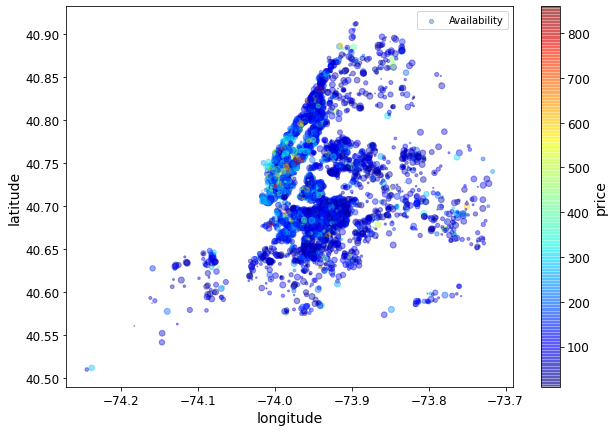

In [102]:
test_set.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
       s = test_set['availability_365']/10, label = 'Availability', figsize = (10,7),c = "price",
       cmap = plt.get_cmap("jet"),colorbar = True, sharex = False)

In [105]:
AB_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48507 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48507 non-null  object 
 1   latitude                        48507 non-null  float64
 2   longitude                       48507 non-null  float64
 3   room_type                       48507 non-null  object 
 4   price                           48507 non-null  int64  
 5   minimum_nights                  48507 non-null  int64  
 6   number_of_reviews               48507 non-null  int64  
 7   reviews_per_month               48507 non-null  float64
 8   calculated_host_listings_count  48507 non-null  int64  
 9   availability_365                48507 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 4.1+ MB


In [150]:
AB_small = AB_clean[1:5000]

In [151]:
AB_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1 to 5064
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             4999 non-null   object 
 1   latitude                        4999 non-null   float64
 2   longitude                       4999 non-null   float64
 3   room_type                       4999 non-null   object 
 4   price                           4999 non-null   int64  
 5   minimum_nights                  4999 non-null   int64  
 6   number_of_reviews               4999 non-null   int64  
 7   reviews_per_month               4999 non-null   float64
 8   calculated_host_listings_count  4999 non-null   int64  
 9   availability_365                4999 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 429.6+ KB


Saving figure Price_and_location


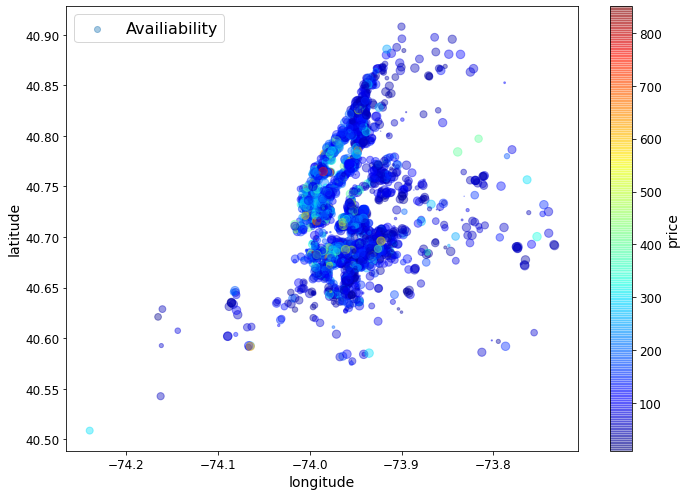

In [152]:
AB_small.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
       s = AB_small['availability_365']/5, label = 'Availiability', figsize = (10,7),c = "price",
       cmap = plt.get_cmap("jet"),colorbar = True, sharex = False)
plt.legend(fontsize = 16)
save_fig("Price_and_location")
plt.show()

No handles with labels found to put in legend.


Saving figure Price_map


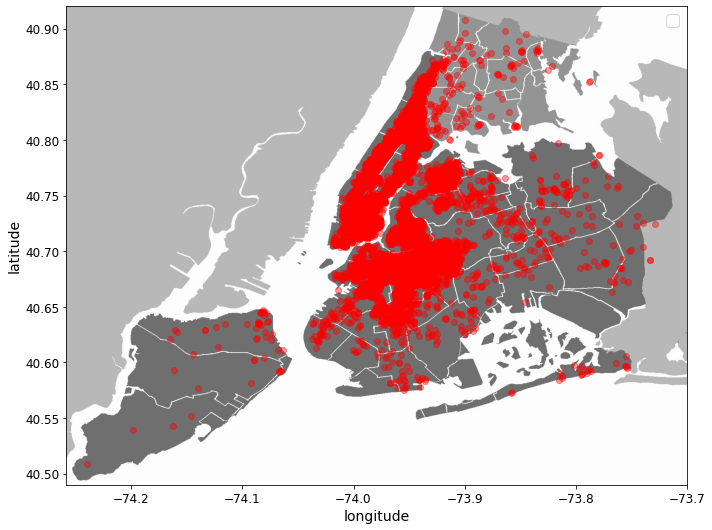

In [131]:
newyorkcity = plt.imread('/Users/jiangyi/ML/New_York_City_.png',0)
# Graph size
plt.figure(figsize=(10,8))

# Graph and image settings
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])

# When an image is included, use it.
ax = plt.gca()


# X: longitude, Y: latitude, Color: Use the color palette of jet colormaps
plt.scatter(AB_small["longitude"], AB_small["latitude"], alpha = 0.4,c = "red",
       cmap = plt.get_cmap("jet"))

# X-axis name: longitude
plt.xlabel('longitude')
# Y-axis name: latitude
plt.ylabel('latitude')

# Graph drawing
plt.legend(fontsize = 16)
save_fig("Price_map")
plt.show()